In [30]:
from tensorflow.keras.layers import Input

C:\Users\suyashi144893\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)



Menu:
1. Generate Images
2. Exit
Enter your choice: 1
Enter number of images to generate: 2
1/1 [==============================] - 0s 221ms/step


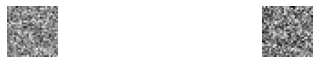


Menu:
1. Generate Images
2. Exit
Enter your choice: 2


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Reshape, LeakyReLU, Input
from tensorflow.keras.optimizers import Adam

# Load MNIST data
(X_train, _), (_, _) = mnist.load_data()
# Normalize data
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
# Flatten the images
X_train = X_train.reshape(X_train.shape[0], 784)

# Generator model
generator = Sequential([
    Dense(256, input_dim=100),
    LeakyReLU(0.2),
    Dense(512),
    LeakyReLU(0.2),
    Dense(1024),
    LeakyReLU(0.2),
    Dense(784, activation='tanh'),
    Reshape((28, 28))
])

# Discriminator model
discriminator = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(1024),
    LeakyReLU(0.2),
    Dense(512),
    LeakyReLU(0.2),
    Dense(256),
    LeakyReLU(0.2),
    Dense(1, activation='sigmoid')
])

# Compile discriminator
discriminator.compile(loss='binary_crossentropy',
                      optimizer=Adam(lr=0.0002, beta_1=0.5))

# Combined network
discriminator.trainable = False
gan_input = Input(shape=(100,))
generated_image = generator(gan_input)
gan_output = discriminator(generated_image)
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

def generate_fake_samples(n_samples):
    noise = np.random.normal(0, 1, (n_samples, 100))
    fake_samples = generator.predict(noise)
    return fake_samples

def generate_and_plot_generated_images(n_samples=10):
    fake_samples = generate_fake_samples(n_samples)
    plt.figure(figsize=(10, 1))
    for i in range(n_samples):
        plt.subplot(1, n_samples, i + 1)
        plt.imshow(fake_samples[i], cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# User interface
def user_interface():
    while True:
        print("\nMenu:")
        print("1. Generate Images")
        print("2. Exit")
        choice = input("Enter your choice: ")
        if choice == '1':
            n_samples = int(input("Enter number of images to generate: "))
            generate_and_plot_generated_images(n_samples)
        elif choice == '2':
            break
        else:
            print("Invalid choice. Please try again.")

# Train GAN
def train_gan(epochs=100, batch_size=128, save_interval=1):
    batch_count = X_train.shape[0] // batch_size

    for epoch in range(epochs):
        for _ in range(batch_count):
            # Generate random noise as input to initialize the generator
            noise = np.random.normal(0, 1, (batch_size, 100))
            # Generate fake images from random noise
            fake_images = generator.predict(noise)
            # Get a random set of real images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            real_images = X_train[idx]
            # Concatenate real and fake images
            combined_images = np.concatenate([real_images, fake_images])
            # Labels for generated and real data
            labels = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])
            # Add random noise to the labels
            labels += 0.05 * np.random.random(labels.shape)
            # Train the discriminator
            d_loss = discriminator.train_on_batch(combined_images, labels)

            # Train the generator
            noise = np.random.normal(0, 1, (batch_size, 100))
            # Labels for generated data
            misleading_labels = np.zeros((batch_size, 1))
            # Train the generator (to have the discriminator label samples as real)
            g_loss = gan.train_on_batch(noise, misleading_labels)

        print(f'Epoch: {epoch + 1}, Discriminator Loss: {d_loss}, Generator Loss: {g_loss}')
        if epoch % save_interval == 0:
            generate_and_plot_generated_images()

# Train the GAN
# Train GAN
def train_gan(epochs=100, batch_size=128, save_interval=1):
    batch_count = X_train.shape[0] // batch_size

    for epoch in range(epochs):
        for _ in range(batch_count):
            # Generate random noise as input to initialize the generator
            noise = np.random.normal(0, 1, (batch_size, 100))
            # Generate fake images from random noise
            fake_images = generator.predict(noise)
            # Get a random set of real images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            real_images = X_train[idx]
            # Reshape real images to match the shape of fake images
            real_images = np.reshape(real_images, (batch_size, 28, 28))
            # Concatenate real and fake images
            combined_images = np.concatenate([real_images, fake_images])
            # Flatten the combined images
            combined_images_flat = np.reshape(combined_images, (2 * batch_size, 784))
            # Labels for generated and real data
            labels = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])
            # Add random noise to the labels
            labels += 0.05 * np.random.random(labels.shape)
            # Train the discriminator
            d_loss = discriminator.train_on_batch(combined_images_flat, labels)

            # Train the generator
            noise = np.random.normal(0, 1, (batch_size, 100))
            # Labels for generated data
            misleading_labels = np.zeros((batch_size, 1))
            # Train the generator (to have the discriminator label samples as real)
            g_loss = gan.train_on_batch(noise, misleading_labels)

        print(f'Epoch: {epoch + 1}, Discriminator Loss: {d_loss}, Generator Loss: {g_loss}')
        if epoch % save_interval == 0:
            generate_and_plot_generated_images()


# Start user interface
user_interface()
